**Basic Business Understanding problems from this dataset are follows,**

1) How much Job Satisfaction could be affected based on Job role? 

2) How Age plays an major role on DailyRate of the employee?

3) How Monthly income was changing with respect to Education of the Employee?

4) Finally I did a small prediction on `Monthly rate` based on following features, 
   Education, Education field, Gender, age, No of companies worked, PercentSalaryHike, YearsInCurrentRole etc...
   using ML techniques( i gave a small try) 

Here below steps followed as per conditions in rubrics

**1) Import all necessary libraries. **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE



**2) Read the dataset.**

In [2]:
#importing and read the files.

df = pd.read_csv('./HR1.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80.0,0,8,0.0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80.0,1,10,3.0,3,10,7,1,7
2,37,Yes,NaN,1373,Research & Development,2,2,Other,1,4,...,2,80.0,0,7,3.0,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80.0,0,8,3.0,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80.0,1,6,3.0,3,2,2,2,2


In [3]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1427 non-null object
DailyRate                   1470 non-null int64
Department                  1410 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1434 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1370 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1307 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

**3)Data preparation**

In [4]:
#detailed description about the dataset 

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1469.0,1470.000000,1470.000000,1466.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.797408,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289186,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Working with Missing values**

In [5]:
#Check the columns that contains any missing values
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel               True
DailyRate                   False
Department                   True
DistanceFromHome            False
Education                   False
EducationField               True
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                       True
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                      True
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome                True
MonthlyRate                  True
NumCompaniesWorked           True
Over18                      False
OverTime                    False
PercentSalaryHike            True
PerformanceRating            True
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

**Inserting and removing rows and columns**

In [6]:
#Inserting and removing the rows and columns
def new_rows(df):
    front=df['Attrition']
    df.drop(labels=['Attrition'],axis=1,inplace=True)
    df.insert(0,'Attrition',front)
    rows = df.head()
    return rows
new_rows(df)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80.0,0,8,0.0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80.0,1,10,3.0,3,10,7,1,7
2,Yes,37,NaN,1373,Research & Development,2,2,Other,1,4,...,2,80.0,0,7,3.0,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80.0,0,8,3.0,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80.0,1,6,3.0,3,2,2,2,2


**Dropping Unwanted rows and Columns**

In [30]:
#drop the columns that are useless in whole progress
def drop_rows(df):
    df.drop(labels=['EmployeeCount','EmployeeNumber','StockOptionLevel','StandardHours'],axis=1,inplace=True)
    drop = df.head()
    return drop
drop_rows(df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EduF
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,10,3,3,10,7,1,7,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,7,3,3,0,0,0,0,4
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,8,3,3,8,7,3,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,6,3,3,2,2,2,2,3


In [31]:
#drop the columns that contains Missing values
df1 = df.dropna(axis=0, how="any") 
df1.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

In [32]:
#Check the head values afer removing the columns with missing values.
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EduF
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,10,3,3,10,7,1,7,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,7,3,3,0,0,0,0,4
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,8,3,3,8,7,3,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,6,3,3,2,2,2,2,3


Text(0.5,1,'Departments in the company')

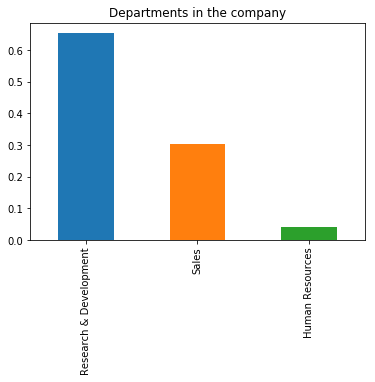

In [33]:
def plott(dep):
    Departments = dep/df1.shape[0]

    (Departments).plot(kind="bar");
    depp = plt.title("Departments in the company");
    return depp
plott(df1.Department.value_counts())

Text(0.5,1,'Employee Education fields in the company')

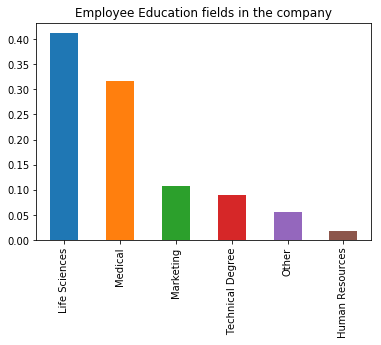

In [34]:
def edu_plot(edu):
    Education = edu/df1.shape[0]

    (Education).plot(kind="bar");
    eduu = plt.title("Employee Education fields in the company");
    return eduu
edu_plot(df1.EducationField.value_counts())

In [35]:
#groupby the importent columns such as gender, education field and monthly income

pd.DataFrame(df1.query("Department == 'Research & Development' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'EducationField']).mean()['MonthlyIncome'])

MonthlyIncome
Gender EducationField                 
Female Life Sciences       6137.277108
       Medical             6695.315789
       Other               6241.400000
       Technical Degree    7671.611111
Male   Life Sciences       6205.857664
       Medical             6426.777251
       Other               6302.589744
       Technical Degree    4574.810345

**1) How much Job Satisfaction could be affected based on Job role?**

In [36]:
def job_sat(df):
    '''
    FUNCTION:
   execute the comparision
    
    INPUT:
    df - JobRole and JobSatisfaction rate data from dataset
    
    OUTPUT:
    comparison between JobRole and JobSatisfaction
    '''
    return df

In [37]:
#How much Job Satisfaction could be affected based on Job role?

job_sat(df1.groupby(['JobRole']).mean()['JobSatisfaction'].sort_values())

JobRole
Human Resources              2.557692
Manufacturing Director       2.682759
Laboratory Technician        2.691120
Research Director            2.700000
Manager                      2.705882
Sales Representative         2.734940
Sales Executive              2.754601
Research Scientist           2.773973
Healthcare Representative    2.786260
Name: JobSatisfaction, dtype: float64

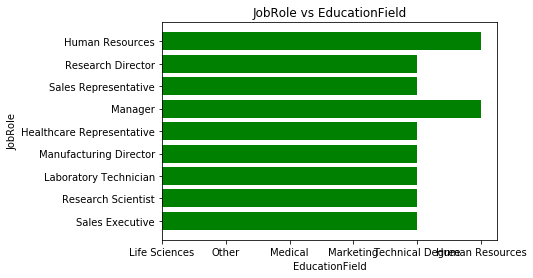

In [38]:
def job_EduF():
    # this is for plotting purpose
    JobR = df1.JobRole
    EducationF = df1.EducationField
    plt.barh(JobR,EducationF, color = "Green")
    plt.ylabel('JobRole', fontsize=10)
    plt.xlabel('EducationField', fontsize=10)
    #plt.xticks(EducationF, MonthlyI, fontsize=12, rotation=45)
    plt.title('JobRole vs EducationField')
    plt.show()
    
job_EduF()
    

**2) How Age plays an major role on DailyRate of the employee?**

In [39]:
def age_daily(df):
    '''
    FUNCTION:
   execute the comparision
    
    INPUT:
    df - age data and daily working rate data from dataset
    
    OUTPUT:
    comparison between age and dailyrate
    '''
    return df

In [40]:
#How Age plays an major role on DailyRate of the employee?

age_daily(df1.groupby(['Age']).mean()['DailyRate'].sort_values())

Age
57    385.500000
19    548.444444
55    646.227273
58    690.500000
23    707.928571
42    713.391304
41    721.525000
31    725.173913
54    727.666667
33    739.672414
18    747.625000
21    762.846154
32    766.262295
25    768.076923
39    774.642857
38    776.155172
29    779.308824
34    788.285714
30    791.266667
52    796.666667
46    802.242424
22    806.937500
48    816.263158
43    818.250000
36    819.130435
20    819.454545
35    825.320513
37    827.720000
60    833.200000
40    841.719298
26    844.769231
45    844.975610
47    852.875000
53    856.684211
44    856.848485
24    863.115385
50    879.100000
49    886.541667
56    904.428571
27    907.333333
28    927.500000
51    953.789474
59    992.300000
Name: DailyRate, dtype: float64

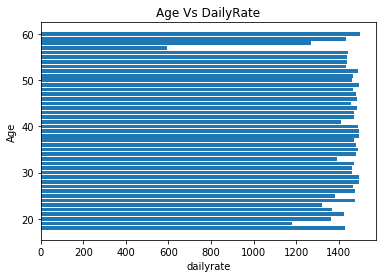

In [41]:
def Age_daily_rate():
    # this is for plotting purpose
    Agee = df1.Age
    dailyrate = df1.DailyRate
    plt.barh(Agee, dailyrate)
    plt.ylabel('Age', fontsize=10)
    plt.xlabel('dailyrate', fontsize=10)
   # plt.xticks(EducationF, MonthlyI, fontsize=12, rotation=45)
    plt.title('Age Vs DailyRate')
    plt.show()
    
Age_daily_rate()

**3) How Monthly income was changing with respect to Education of the Employee?**

In [42]:
#How Monthly income was changing with respect to Education of the Employee?

def edu_mon(df):
    '''
    FUNCTION:
   execute the comparision
    
    INPUT:
    df - Education_field data and montlyIncome data from dataset
    
    OUTPUT:
    comparison between Education field and monthly income
    '''
    return df

In [43]:
edu_mon(df1.groupby(['EducationField']).mean()['MonthlyIncome'])

EducationField
Human Resources     7241.148148
Life Sciences       6463.288779
Marketing           7348.584906
Medical             6510.036638
Other               6071.548780
Technical Degree    5758.303030
Name: MonthlyIncome, dtype: float64

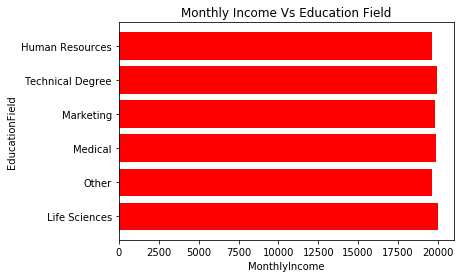

In [49]:
def eduF_monI():
    # this is for plotting purpose
    EducationF = df1.EducationField
    MonthlyI = df1.MonthlyIncome
    plt.barh(EducationF, MonthlyI, color = "Red")
   # plt.barh()
    plt.ylabel('EducationField', fontsize=10)
    plt.xlabel('MonthlyIncome', fontsize=10)
    #plt.xticks(EducationF, MonthlyI, fontsize=12, rotation=45)
    plt.title('Monthly Income Vs Education Field')
    plt.show()
    
eduF_monI()
    

**Heat map seaborn for Correlation between the dataframes**

In [50]:
def get_heatmap(df):
    '''
    FUNCTION:
    plots a seaborn heatmap based on the correlation
    
    INPUT:
    df - the pandas dataframe you want to present
    
    OUTPUT:
    matplotlib Axes
    '''
    return sns.heatmap(df)

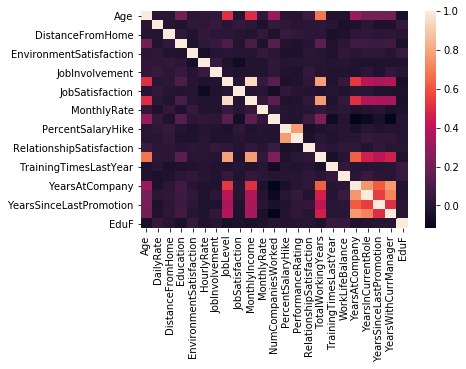

In [51]:
get_heatmap(df1.corr())

**4) Finally I did a small prediction on `Monthly rate` based on followinf features, 
   Education, Education field, Gender, age, No of companies worked, PercentSalaryHike, YearsInCurrentRole etc...
   using ML techniques.**

In [52]:
#columns before implement Algorithms
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EduF'],
      dtype='object')

** Implemntation of ML algorithms without LabelEncoders and also without categorical values **

In [53]:

#Split into explanatory and response variables
X = df1[["Age",'Education','NumCompaniesWorked','PercentSalaryHike','YearsInCurrentRole']]
y = df1['MonthlyRate']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 


#print(train_score)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was -0.008027464541641383 on 441 values.'

In [54]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EduF'],
      dtype='object')

**Implement the Support Vector Classifier algorithm along with the LabelEncoders for the datafrmae that contains categorical values**

In [55]:
from sklearn.preprocessing import LabelEncoder
dff = pd.read_csv('./HR.csv')



dff['Gen'] = LabelEncoder().fit_transform(dff['Gender'])
dff['EduF'] = LabelEncoder().fit_transform(dff['EducationField'])
dff['Depart'] = LabelEncoder().fit_transform(dff['Department'])
#print(df[['Gen','EduF','Depart']])

#Only use quant variables and drop any rows with missing values
num_vars = dff[["Age",'Gen','EduF','Depart','Education','NumCompaniesWorked','PercentSalaryHike','YearsInCurrentRole','MonthlyRate']]
#Drop the rows with missing salaries
#drop_sal_df = num_vars.dropna(subset=['MonthlyRate'], axis=0)

# Mean function
#fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
#fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = dff[["Age",'Gen','EduF','Depart','Education','NumCompaniesWorked','PercentSalaryHike','YearsInCurrentRole']]
y = dff['MonthlyRate']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = SVC() # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score and accuracy_score for the model using only quantitative variables was {} and {} on {} values.".format(r2_score(y_test, y_test_preds),accuracy_score(y_test, y_test_preds), len(y_test))
#"The accuracy score for the model using only quantitative variables was {} on {} values.".format(accuracy_score(y_test, y_test_preds), len(y_test))

'The r-squared score and accuracy_score for the model using only quantitative variables was -0.9084415882233425 and 0.0022675736961451248 on 441 values.'

** Testing/ Checking cells for the above processess**

In [56]:
df["Gender"].head()

0    Female
1      Male
2      Male
3    Female
4      Male
Name: Gender, dtype: object

In [57]:
df = pd.read_csv('./HR.csv')
#dff['Male'] = dff['Gender'].map( {'Male':1, 'Female':0} )
#dff[['Gender', 'Male']]

from sklearn.preprocessing import LabelEncoder
df['EduF'] = LabelEncoder().fit_transform(df['EducationField'])
df[['EducationField', 'EduF']]

,EducationField,EduF
0,Life Sciences,1
1,Life Sciences,1
2,Other,4
3,Life Sciences,1
4,Medical,3
5,Life Sciences,1
6,Medical,3
7,Life Sciences,1
8,Life Sciences,1
9,Medical,3
